<a href="https://colab.research.google.com/github/jenniferarzu/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jennifer Arzu**

# **HOMEWORK 5 Coding: The relationship between concentration of homeless shelters and count of 311 requests related to homeless services**

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm 

In [113]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


**Problem Statement**: Homelesses is a big concern in New York City. The Department of Homeless Services is tasked with providing services and housing for people who are homeless. They recently began publishing the count of homeless shelter buildings per community district on NYC Open Data to provide more transparency into where shelters are located. The dataset provides counts in multiple columns for different categories of buildings. It also includes counts from different reporting dates.

The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.

**Step 1. Load the datasets:**

- Cleaned 311 data that excludes records with invalid community districts. Shared with you on Google Drive as cleaned_311_data_revised.csv
- NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district.
Data source page where you can preview the data: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
CSV data download link you can plug into the pd.read_csv() function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD

In [115]:
#loading the 311 dataset
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#loading the shelter dataset 
shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [117]:
shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


**Step 2.** Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'



In [0]:
shelter_filtered=shelter[shelter['Report Date']== '09/30/2019']

In [119]:
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


In [120]:
#checking for duplicates
shelter_filtered.groupby('Community District').size().reset_index(name='count_of_shelters').sort_values('Community District', ascending=True)

,Community District,count_of_shelters
0,101,1
1,103,1
2,104,1
3,105,1
4,106,1
5,107,1
6,108,1
7,109,1
8,110,1
9,111,1


In [0]:
#dropping duplicates in Community District Column only 
shelter_filtered=shelter_filtered.drop_duplicates('Community District')

In [122]:
#checking to make sure duplicates in Bronx CDs were dropped
shelter_filtered.groupby('Community District').size().reset_index(name='count_of_shelters').sort_values('Community District', ascending=True)

,Community District,count_of_shelters
0,101,1
1,103,1
2,104,1
3,105,1
4,106,1
5,107,1
6,108,1
7,109,1
8,110,1
9,111,1


**Step 3.** Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

Tip: There are multiple ways to add these columns together. With one approach, you may find that your total column contains NaN values. This is because many of the columns contains NaN/empty values. When you add a real number to a NaN, the sum will be NaN. To get around this, you will need to fill in all the NaN values with 0 instead. Use the .fillna(0) method on your shelter count dataframe.

In [0]:
#calculating sum of specified columns using sum function with axis=1 specifying column
#with skipna=True to exclude NA/null values when computing result
shelter_filtered['shelter_count']=shelter_filtered[['Adult Family Comm Hotel', 'Adult Family Shelter','Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Shelter','FWC Comm Hotel']].sum(axis=1,skipna=True)

In [124]:
#checking to make sure shelter count column was created
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_count
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0,8.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0,32.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0,21.0


**Step 4.** From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [126]:
#quickly examining dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [0]:
#creating subset of 311 dataset with only Homeless Person Assistance complaint type
homeless_assistance= df[df.complaint_type=='Homeless Person Assistance']

In [128]:
#checking newly created dataframe 
homeless_assistance.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


**Step 5.** Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district



In [0]:
homeless_assistance_grouped=homeless_assistance.groupby('borocd').size().reset_index(name='count_of_homeless_person')

In [131]:
homeless_assistance_grouped

,borocd,count_of_homeless_person
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020
5,106.0,753
6,107.0,1684
7,108.0,633
8,109.0,303
9,110.0,283



**Step 6.** Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).

-Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the .fillna(0) method on your dataframe.

In [0]:
merged_data = pd.merge(left=homeless_assistance_grouped,  right=shelter_filtered, how='left', left_on='borocd', right_on='Community District')

In [133]:
#quick check to ensure data merged appropriately  
merged_data.head()

,borocd,count_of_homeless_person,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_count
0,101.0,758,09/30/2019,Manhattan,101.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
1,102.0,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103.0,520,09/30/2019,Manhattan,103.0,NaN,NaN,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,NaN,1.0,3.0,NaN,NaN,4.0,NaN,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,NaN,1.0,NaN,NaN,NaN,8.0,1.0,10.0


In [135]:
#filling in NaNs with zeros in merged dataframe using the .fillna(0) method 
merged_data=merged_data.fillna(0)
merged_data.head()

,borocd,count_of_homeless_person,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,shelter_count
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0



**Step 7.** Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests

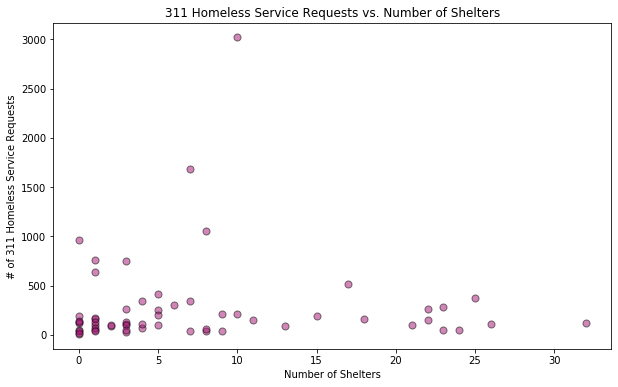

In [136]:
# define the data that will be used
x = np.array(merged_data.shelter_count)
y = np.array(merged_data.count_of_homeless_person)

# define the styling of the scatter plot
color = '#a31072' 
area = 50 

plt.figure(figsize=(10, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('311 Homeless Service Requests vs. Number of Shelters')
plt.xlabel('Number of Shelters')
plt.ylabel('# of 311 Homeless Service Requests')

plt.show()

***Answer: Based on the scatter plot, my inital impression is that there is no correlation between number of 311 homeless service requests ad number of shelters as the points are scattered. The data appears to oscillate and thus does not appear to be linear.***


**Step 8.** Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [137]:
x = np.array(merged_data.shelter_count)
y = np.array(merged_data.count_of_homeless_person)

np.corrcoef(x, y)

array([[1.        , 0.01073618],
       [0.01073618, 1.        ]])

***Very weak positive correlation (essentially no correlation)***


**Step 9.** Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [138]:
#y variable
y = np.array(merged_data.count_of_homeless_person)

#x variable with constant added
x = np.array(merged_data.shelter_count)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.006571
Date:                Wed, 04 Dec 2019   Prob (F-statistic):              0.936
Time:                        03:10:29   Log-Likelihood:                -445.94
No. Observations:                  59   AIC:                             895.9
Df Residuals:                      57   BIC:                             900.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.4772     83.126      3.302      0.0

**Step 10.** Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [139]:
#saving model results as objects
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

# making label for line of the best fit to use in scatter plot
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

parameters: [274.47717459   0.59920962]
R2: 0.00011526563489161479
y = 0.6x + 274.48; R2 = 0.0


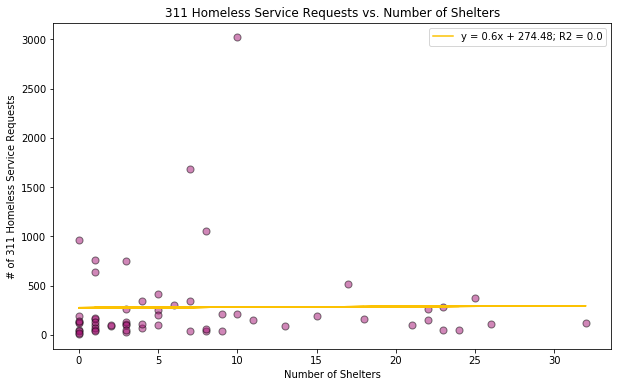

In [141]:
# define the data that will be used
x_dummy = np.array(merged_data.shelter_count)

plt.figure(figsize=(10, 6))

plt.scatter(
    np.array(merged_data.shelter_count),            #x
    np.array(merged_data.count_of_homeless_person), #y
    s=50,  # size of marker
    c='#a31072', 
    edgecolors='black', # outline color of the marker
    alpha=0.5)

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#fcc203', 
    label=label)

plt.title('311 Homeless Service Requests vs. Number of Shelters')
plt.xlabel('Number of Shelters')
plt.ylabel('# of 311 Homeless Service Requests')
plt.legend()

plt.show()

**Step 11:** Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

***Answer: Results from the simple linear regression analysis indicate that the model predicting frequency of 311 requests related to homelessness based on concentration of homeless shelters is not statistically signicant, with nearly none of the variance in frequency of 311 requests related to homelessness accounted by concentration of homeless shelters [R2=0.0001, F(1,57)=0.006571, p=0.936]. In other words, the model is a poor fit for the data.***